In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install pydicom

     |████████████████████████████████| 35.3MB 118kB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '15PDQTiTLwT_7ruA27hy-fltsUoo-mN2v'})
#download image-path-csv

In [7]:
download.GetContentFile('final_paths.zip')
!unzip final_paths.zip

Archive:  final_paths.zip
  inflating: calc_case_description_test_set.csv  
  inflating: __MACOSX/._calc_case_description_test_set.csv  
  inflating: calc_case_description_train_set.csv  
  inflating: __MACOSX/._calc_case_description_train_set.csv  
  inflating: train_data(1).csv       
  inflating: __MACOSX/._train_data(1).csv  
  inflating: train_data(2).csv       
  inflating: __MACOSX/._train_data(2).csv  
  inflating: train_data(3).csv       
  inflating: __MACOSX/._train_data(3).csv  


In [0]:
download = drive.CreateFile({'id': '1763XJMuw1HVGDiWcyPhHlnrub2-H8rIv'})
#download train-set-1

In [0]:
download.GetContentFile('CBIS_DDSM_Calc_Training1.zip')
!unzip CBIS_DDSM_Calc_Training1.zip

In [0]:
!rm CBIS_DDSM_Calc_Training1.zip
#Delete the train_set_1.zip to save disk space

In [0]:
download = drive.CreateFile({'id': '1aJt2HXHwkhJLIrtDYseGYmT2JWW2bTtw'})
#download train-set-2

In [0]:
download.GetContentFile('CBIS_DDSM_Calc_Training2.zip')
!unzip CBIS_DDSM_Calc_Training2.zip

In [0]:
!rm CBIS_DDSM_Calc_Training2.zip
#Delete the train_set_2.zip to save disk space

In [0]:
download = drive.CreateFile({'id': '1xj5ZGZZ_PqNlbulU0lB2gWAKWy9j3XBg'})
#download train-set-3

In [0]:
download.GetContentFile('CBIS_DDSM_Calc_Training3.zip')
!unzip CBIS_DDSM_Calc_Training3.zip
#till now all training data are loaded

In [0]:
!rm CBIS_DDSM_Calc_Training3.zip
#Delete the train_set_3.zip to save disk space

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import cv2
import pydicom
from PIL.Image import fromarray
from os import path
from PIL import Image
from PIL import ImageEnhance

Using TensorFlow backend.


In [0]:
my_train = pd.read_csv('calc_case_description_train_set.csv')

In [19]:
my_train.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [20]:
!pip install pypng

     |████████████████████████████████| 655kB 2.8MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=747f51b0e3657164802704935077c26eb1c12090f979fe9769c9495fd8b27637
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [21]:
from os import path
from matplotlib import pyplot, cm
import png

train_image = []
for i in tqdm(range(my_train.shape[0])):
    png_file = my_train['image file path'][i].replace('dcm','png')
    
    with open(my_train['image file path'][i], "r") as file:
      ds = pydicom.dcmread(my_train['image file path'][i])
      shape = ds.pixel_array.shape
      # Convert to float to avoid overflow or underflow losses.
      image_2d = ds.pixel_array.astype(float)

      # Rescaling grey scale between 0-255
      image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

      # Convert to uint
      image_2d_scaled = np.uint8(image_2d_scaled)

      # Write the PNG file
      with open(png_file, 'wb') as w_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(w_file, image_2d_scaled)


100%|██████████| 1546/1546 [30:19<00:00,  1.18s/it]


In [22]:
from PIL import ImageEnhance, Image
train_image = []
for i in tqdm(range(my_train.shape[0])):
  png_file = my_train['image file path'][i].replace('dcm','png')
  with open(png_file, "r") as file:
    img = image.load_img(png_file, target_size=(256, 256))
    img_rotate1 = img.rotate(45)
    img_arr = image.img_to_array(img)
    img_arr_rotate1 = image.img_to_array(img_rotate1)
    img_arr = img_arr/255
    img_arr_rotate1 = img_arr_rotate1/255
    train_image.append(img_arr)
    train_image.append(img_arr_rotate1)
    
X = np.array(train_image)

100%|██████████| 1546/1546 [02:58<00:00,  8.66it/s]


In [23]:
X.shape

(3092, 256, 256, 3)

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
train = pd.DataFrame(np.repeat(my_train.values,2,axis=0))
train.columns = my_train.columns

In [26]:
train['label'] = -1
print(train.shape)

(3092, 15)


In [27]:
def add_label(my_df):
    for i in range(len(my_df)): 
        if my_df['pathology'][i] == 'BENIGN':
          my_df['label'][i] = 0
        elif my_df['pathology'][i] == 'BENIGN_WITHOUT_CALLBACK':
          my_df['label'][i] = 1
        elif my_df['pathology'][i] == 'MALIGNANT':
          my_df['label'][i] = 2
    return my_df
add_label(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,label
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,2
1,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,2
2,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,2
3,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,2
4,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,2
3088,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,0
3089,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,0
3090,P_02584,1,LEFT,MLO,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02584_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02584_LEFT_MLO_1/1.3.6.1.4.1.9...,0


In [0]:
y = train['label'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
tf.keras.backend.clear_session()

In [0]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1], 
                       kernel_regularizer=regularizers.l2(0.02)))
model.add(layers.Dropout(0.5))
# 3 classes with softmax activation for multi-class
model.add(layers.Dense(3, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/50
78/78 [==============================] - 172s 2s/step - loss: 1.7681 - accuracy: 0.4032 - val_loss: 1.1200 - val_accuracy: 0.4992
Epoch 2/50
78/78 [==============================] - 171s 2s/step - loss: 1.1487 - accuracy: 0.4719 - val_loss: 1.1538 - val_accuracy: 0.4927
Epoch 3/50
78/78 [==============================] - 170s 2s/step - loss: 1.1500 - accuracy: 0.5006 - val_loss: 1.1051 - val_accuracy: 0.5057
Epoch 4/50
78/78 [==============================] - 170s 2s/step - loss: 1.1479 - accuracy: 0.5228 - val_loss: 1.1001 - val_accuracy: 0.5250
Epoch 5/50
78/78 [==============================] - 172s 2s/step - loss: 1.1608 - accuracy: 0.5410 - val_loss: 1.1011 - val_accuracy: 0.5525
Epoch 6/50
78/78 [==============================] - 172s 2s/step - loss: 1.1752 - accuracy: 0.5443 - val_loss: 1.1517 - val_accuracy: 0.5622
Epoch 7/50
78/78 [==============================] - 173s 2s/step - loss: 1.1917 - accuracy: 0.5661 - val_loss: 1.2427 - val_accuracy: 0.5250
Epoch 8/50
78

20/20 - 9s - loss: 1.5724 - accuracy: 0.6220


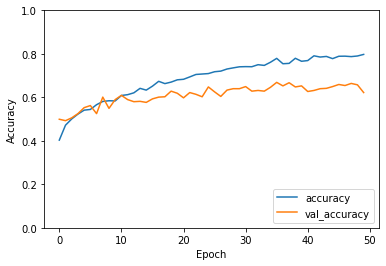

In [74]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [0]:
for i in range(1500):
  if os.path.exists(train['image file path'][i]):
    os.remove(train['image file path'][i])

In [0]:
download = drive.CreateFile({'id': '1loLhWCXJRplETWsyLZ3Akn-jcckZDaLM'})
#download test-set

In [0]:
download.GetContentFile('CBIS_DDSM_Calc_nTest.zip')
!unzip CBIS_DDSM_Calc_nTest.zip
### May crash! Disk volumn is not enough for this part of data!

In [0]:
!rm CBIS_DDSM_Calc_nTest.zip
#Delete the train_set_1.zip to save disk space

In [46]:
my_test = pd.read_csv('calc_case_description_test_set.csv')
my_test.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [47]:
test_image = []
for i in tqdm(range(my_test.shape[0])):

  png_file = my_test['image file path'][i].replace('dcm','png')
    
  with open(my_test['image file path'][i], "r") as file:
    ds = pydicom.dcmread(my_test['image file path'][i])
    shape = ds.pixel_array.shape
    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)

      # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

      # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

      # Write the PNG file
    with open(png_file, 'wb') as w_file:
      w = png.Writer(shape[1], shape[0], greyscale=True)
      w.write(w_file, image_2d_scaled)


100%|██████████| 326/326 [06:24<00:00,  1.18s/it]


In [48]:
test_image = []
for i in tqdm(range(my_test.shape[0])):
  png_file = my_test['image file path'][i].replace('dcm','png')
  with open(png_file, "r") as file:
    img = image.load_img(png_file, target_size=(256, 256))
    img_rotate1 = img.rotate(45)
    img_arr = image.img_to_array(img)
    img_arr_rotate1 = image.img_to_array(img_rotate1)
    img_arr = img_arr/255
    img_arr_rotate1 = img_arr_rotate1/255
    test_image.append(img_arr)
    test_image.append(img_arr_rotate1)
    
X_pre = np.array(test_image)

100%|██████████| 326/326 [00:34<00:00,  9.33it/s]


In [0]:
test = pd.DataFrame(np.repeat(my_test.values,2,axis=0))
test.columns = my_test.columns

In [0]:
test['label'] = -1

In [51]:
def add_label(my_df):
    for i in range(len(my_df)): 
        if my_df['pathology'][i] == 'BENIGN':
          my_df['label'][i] = 0
        elif my_df['pathology'][i] == 'BENIGN_WITHOUT_CALLBACK':
          my_df['label'][i] = 1
        elif my_df['pathology'][i] == 'MALIGNANT':
          my_df['label'][i] = 2
    return my_df
add_label(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,label
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,0
1,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,0
2,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,0
3,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,0
4,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,0
648,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,2
649,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,2
650,P_02501,3,RIGHT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,Calc-Test_P_02501_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02501_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02501_RIGHT_MLO_1/1.3.6.1.4.1.9590...,2


In [0]:
y_pre = test['label'].values

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
prediction = model.predict_classes(X_pre)
accuracy_score(y_pre,prediction)

0.5414110429447853